Let's do some word counting!

From two sets of bags: one with duplicates removed (thredds) and one without. Note that there are still issues with parsers, with bag generation, with thredds.

What we're doing:

- ~~create a bag of words for each successfully parsed response (bag must have two or more words)~~
- create a bag of words from the xml text()/attrib.values (raw xml no semantic understanding, etc)
- map identity to data flag (is it a data service?)
- let's do some eda - number of words per response type (which, thought i had done that?)
- chart words per data v not data

and, if that looks reasonable, let's make a linear regression - one parameter (word count) to predict boolean data v no data.

In [45]:
import os
import glob
import json

identified_bows = []

for f in glob.glob('../solr_superset/bags_of_words_no_dupes/*.txt'):
    with open(f, 'r') as g:
        bow = g.read()
    
    c = len([b for b in bow.split() if b])
    
    basename = os.path.basename(f).split('_')[0]
    
    # go get the identified result and see what it is
    ip = os.path.join('../solr_superset/identified/', basename + '_identified.json')
    if not os.path.exists(ip):
        print 'missing file: ', ip
        continue
    
    with open(ip, 'r') as g:
        data = json.loads(g.read())
    
    protocol = data.get('identity', {}).get('protocol', '')
    
    if not protocol:
        print 'no identity: ', f
        continue
    
    identified_bows.append((f, c, protocol))

identified_bows[:5]


[('../solr_superset/bags_of_words_no_dupes/0005001cd381e9613dc44fe6efafdf08_parsed_bow.txt',
  178,
  u'ISO-19115'),
 ('../solr_superset/bags_of_words_no_dupes/00164fc758489d7c671f939d6c533bad_parsed_bow.txt',
  107,
  u'ISO-19115'),
 ('../solr_superset/bags_of_words_no_dupes/001ef148783e50940d569316c6b6d608_parsed_bow.txt',
  4,
  u'UNIDATA'),
 ('../solr_superset/bags_of_words_no_dupes/003492e5f3a49d31f697200a7f427122_parsed_bow.txt',
  182,
  u'ISO-19115'),
 ('../solr_superset/bags_of_words_no_dupes/004749541a8acce4f454dd95f6b0c4c9_parsed_bow.txt',
  3,
  u'OpenSearch')]

In [ ]:
# let's make some better bags of words


{'mean': {u'ISO-19115': 105.63237979306147,
  u'OAI-PMH': 3.2941176470588234,
  u'OGC:CSW': 19.0,
  u'OGC:SOS': 81.333333333333329,
  u'OGC:WCS': 33.81818181818182,
  u'OGC:WFS': 19.572815533980581,
  u'OGC:WMS': 51.650406504065039,
  u'OpenSearch': 10.553088803088803,
  u'UNIDATA': 9.5384615384615383}}

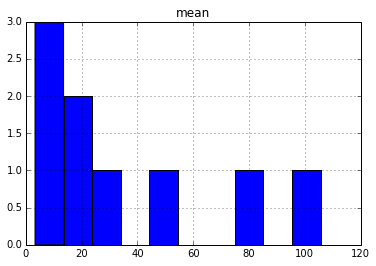

In [41]:
import pandas as pd
import numpy as np


pd.set_option('precision',2)

df = pd.DataFrame(identified_bows, columns=['file', 'count', 'protocol'])

p_df = df.groupby(df['protocol'])
#p_df.agg([np.mean])

p_df = df.groupby(df['protocol']).agg({'count': {'mean':'mean'}})

p_df.columns = p_df.columns.droplevel(0)

df.groupby(df['protocol']).agg({'count': {'mean':'mean'}})['count'].hist()

p_dt = p_df.to_dict()

p_dt

In [40]:
#new_df = p_df.agg([np.mean])
new_df['count']


,mean
protocol,
ISO-19115,105.6
OAI-PMH,3.3
OGC:CSW,19.0
OGC:SOS,81.3
OGC:WCS,33.8
OGC:WFS,19.6
OGC:WMS,51.7
OpenSearch,10.6
UNIDATA,9.5


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

xlocations = np.array(range(len(p_dt['mean'].keys())))+0.5

fig, ax = plt.subplots()

ax.bar(xLocations, p_dt['mean'].values(0, width=200)
xticks(xLocations+200/2, p_dt['mean'].keys())

plt.show()

SyntaxError: invalid syntax (<ipython-input-43-169aae5eeb7b>, line 9)